<a href="https://colab.research.google.com/github/PJinss/Section1-Project/blob/main/AI_13%EA%B8%B0_%EB%B0%95%EC%A7%84%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/vgames2.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
del df['Unnamed: 0'],df['Publisher']  # del df['열 이름'] // 해당열 날리기. // 나의 생각으로는 게임회사는 중요도가 낮다고 판단되어짐

df # - 이 데이터만 가지고 전처리를 할것이다.

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,0.05,0.05,0.25,0.03


In [ ]:
drop_values = ['M','K'] # 지워낼 문자열을 리스트 형태로 저장.
df = df[~df['NA_Sales'].str.contains('|'.join(drop_values))]
df = df[~df['EU_Sales'].str.contains('|'.join(drop_values))]
df = df[~df['JP_Sales'].str.contains('|'.join(drop_values))]
df = df[~df['Other_Sales'].str.contains('|'.join(drop_values))]

# -- [특정 피쳐] <내의 M K 가 포함된 문자열을 가지고 있는 행을 삭제합니다.

In [ ]:
# 결측치를 확인할때 좋은 코드 // 해당 열의 NaN의 값이 들어간 부분을 더해서 숫자로 보여준다
df.isnull().sum()

Name             0
Platform         0
Year           254
Genre           48
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
df = df.dropna() # axis=0 은 행을 뜻하며 동시에 default 값이고, axis=1 은 열을 뜻함. // 결측치는 싹다 제거해버림.

In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15511 entries, 0 to 16597
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         15511 non-null  object 
 1   Platform     15511 non-null  object 
 2   Year         15511 non-null  float64
 3   Genre        15511 non-null  object 
 4   NA_Sales     15511 non-null  object 
 5   EU_Sales     15511 non-null  object 
 6   JP_Sales     15511 non-null  object 
 7   Other_Sales  15511 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.1+ MB


Name           0
Platform       0
Year           0
Genre          0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [ ]:
def year(x):
  if ( x >= 0) & ( x < 20):
    return int(2000 + x)
  elif (x > 25) & (x < 100):
    return int(1900 + x)
  else:
    return int(x)

df['Year'] = df['Year'].apply(year)


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15511 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         15511 non-null  object 
 1   Platform     15511 non-null  object 
 2   Year         15511 non-null  int64  
 3   Genre        15511 non-null  object 
 4   NA_Sales     15511 non-null  float64
 5   EU_Sales     15511 non-null  float64
 6   JP_Sales     15511 non-null  float64
 7   Other_Sales  15511 non-null  float64
 8   Total_Sales  15511 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
df['NA_Sales'] = df['NA_Sales'].map(pd.eval).astype(float) 
df['EU_Sales'] = df['EU_Sales'].map(pd.eval).astype(float) 
df['JP_Sales'] = df['JP_Sales'].map(pd.eval).astype(float) 
df['Other_Sales'] = df['Other_Sales'].map(pd.eval).astype(float) 

df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
count,15511.000000,15511.000000,15511.000000,15511.000000,15511.000000,15511.000000
mean,2006.404487,0.263458,0.146198,0.077637,0.048241,0.535533
std,5.831329,0.823324,0.509802,0.309493,0.192407,1.568628
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2017.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
# 내가 필요한 데이터 만들기. == 그래프 그릴 피쳐만 모여있는 데이터가 필요해

In [ ]:
# 그룹화 // 군집화 // 클러스터링 초기단계
num_Platform = df['Platform'].unique() # 변수를 만들어서 = 해당 컬럼의 값들 나열한것을 할당. unique
print(len(num_Platform)) # 값들을 나열시키고 그 개수를 세어본다.
num_Platform # 값들을 출력해본다.

31


array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'GBA', 'PS4', 'PS2', 'PS', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
num_Year = df['Year'].unique()
print(len(num_Year))
num_Year

38


array([2008, 2009, 2010, 2005, 2011, 2007, 2003, 2006, 2014, 2015, 2002,
       1997, 2013, 1996, 2004, 2000, 1984, 1998, 2001, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 2017, 1980])

In [ ]:
num_Genre = df['Genre'].unique()
print(len(num_Genre))
num_Genre

12


array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Role-Playing', 'Puzzle', 'Strategy', 'Fighting', 'Racing',
       'Shooter'], dtype=object)

In [ ]:
# 한개의 게임에 대한 판매량(모든 나라의)을 합친것 수치를 나타내보자. << Feature Engineering >>

df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

df  # 오른편에 추가된것을 확인할 수 있다.

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005,Action,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015,Sports,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013,Action,0.05,0.05,0.25,0.03,0.38


In [ ]:
# 지역마다 선호하는 게임 장르 나누기
# 1step . 장르와 전체 판매량을 묶기.

df_genre = df.groupby(by=['Genre'])['Total_Sales'].sum()
df_genre

Genre
Action          1619.63
Adventure        224.34
Fighting         422.44
Misc             759.13
Platform         770.61
Puzzle           237.40
Racing           684.01
Role-Playing     836.14
Shooter          975.46
Simulation       372.65
Sports          1241.05
Strategy         163.79
Name: Total_Sales, dtype: float64

In [ ]:
# step_2 . (장르와 북미 , 장르와 유럽 , 장르와 일본 ,  장르와 그외) 를 각각 묶기.
df_genre_na =  df.groupby(by=['Genre'])['NA_Sales'].sum()
df_genre_na

Genre
Action          804.71
Adventure        97.88
Fighting        210.75
Misc            386.36
Platform        413.88
Puzzle          118.97
Racing          335.27
Role-Playing    295.54
Shooter         546.92
Simulation      174.03
Sports          636.44
Strategy         65.74
Name: NA_Sales, dtype: float64

In [ ]:
df_genre_eu =  df.groupby(by=['Genre'])['EU_Sales'].sum()
df_genre_eu

Genre
Action          487.72
Adventure        61.04
Fighting         94.36
Misc            202.66
Platform        185.36
Puzzle           50.04
Racing          223.48
Role-Playing    166.89
Shooter         294.28
Simulation      107.46
Sports          351.05
Strategy         43.33
Name: EU_Sales, dtype: float64

In [ ]:
df_genre_jp =  df.groupby(by=['Genre'])['JP_Sales'].sum()
df_genre_jp

Genre
Action          150.71
Adventure        49.30
Fighting         82.95
Misc             99.94
Platform        123.19
Puzzle           56.21
Racing           51.50
Role-Playing    320.83
Shooter          37.19
Simulation       61.59
Sports          126.83
Strategy         43.98
Name: JP_Sales, dtype: float64

In [ ]:
df_genre_ot =  df.groupby(by=['Genre'])['Other_Sales'].sum()
df_genre_ot

Genre
Action          176.49
Adventure        16.12
Fighting         34.38
Misc             70.17
Platform         48.18
Puzzle           12.18
Racing           73.76
Role-Playing     52.88
Shooter          97.07
Simulation       29.57
Sports          126.73
Strategy         10.74
Name: Other_Sales, dtype: float64

In [ ]:
df_genreF = df_genre.combine_first(df_genre_na).combine_first(df_genre_eu).combine_first(df_genre_jp).combine_first(df_genre_ot)
print(type(df_genre),df_genre)

mydf = pd.concat([df_genreF,df_genre_eu,df_genre_jp,df_genre_na,df_genre_ot],axis=1) # '시리즈에서 데이터 프레임으로 변환'되어진 애들을 다 합쳐버림.

mydf # 그래프를 그릴 데이터 완성

<class 'pandas.core.series.Series'> Genre
Action          1619.63
Adventure        224.34
Fighting         422.44
Misc             759.13
Platform         770.61
Puzzle           237.40
Racing           684.01
Role-Playing     836.14
Shooter          975.46
Simulation       372.65
Sports          1241.05
Strategy         163.79
Name: Total_Sales, dtype: float64


,Total_Sales,EU_Sales,JP_Sales,NA_Sales,Other_Sales
Genre,,,,,
Action,1619.63,487.72,150.71,804.71,176.49
Adventure,224.34,61.04,49.30,97.88,16.12
Fighting,422.44,94.36,82.95,210.75,34.38
Misc,759.13,202.66,99.94,386.36,70.17
Platform,770.61,185.36,123.19,413.88,48.18
Puzzle,237.40,50.04,56.21,118.97,12.18
Racing,684.01,223.48,51.50,335.27,73.76
Role-Playing,836.14,166.89,320.83,295.54,52.88
Shooter,975.46,294.28,37.19,546.92,97.07


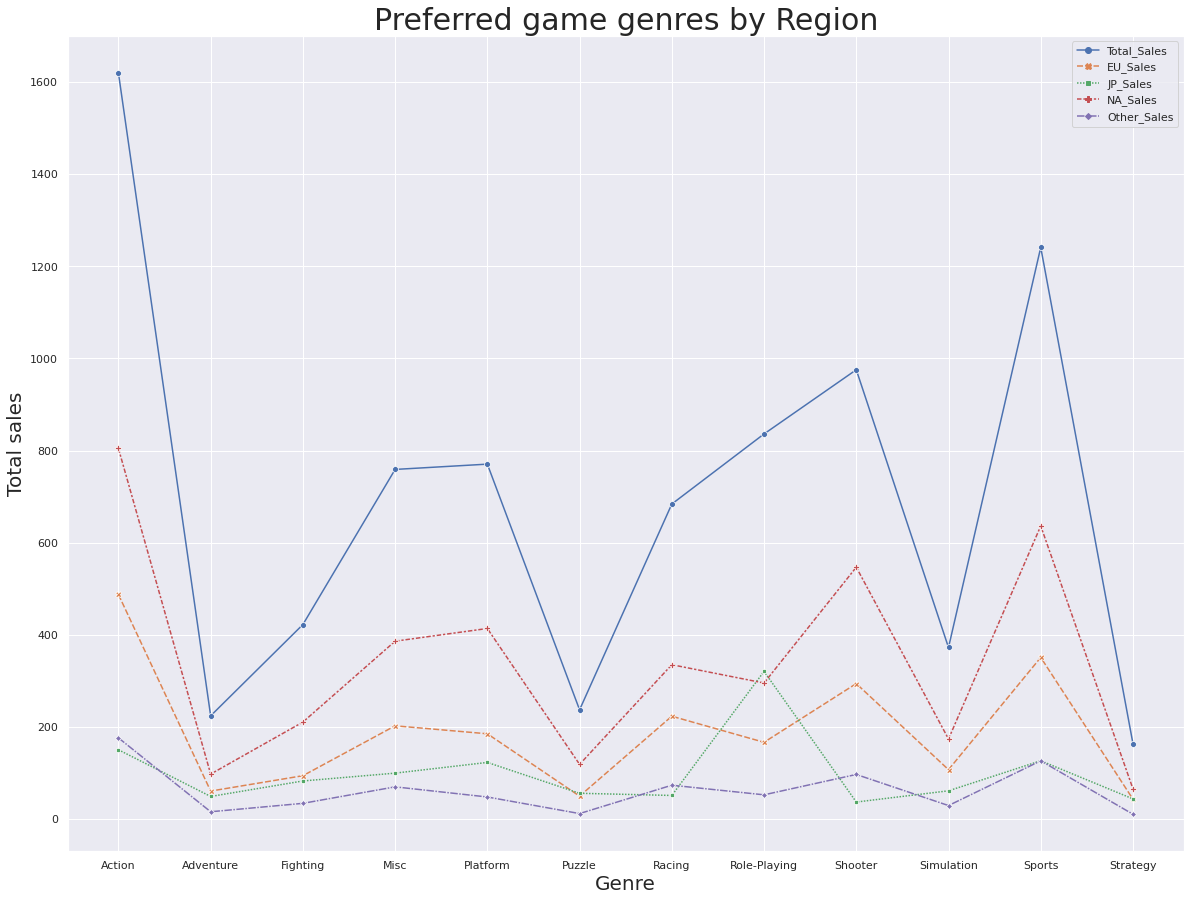

In [ ]:
sns.set(style='darkgrid')    # seaborn의 스타일을 세팅합니다. 다크그리드
plt.figure(figsize= (20,15)) # 
plt.title('Preferred game genres by Region',fontsize=30) # 내가 만든 그래프의 이름을 짓는다.
plt.xlabel('Genre', fontsize=20)                         # x 선에 이름을 넣는다.
plt.ylabel('Total sales',fontsize=20)                    # y 선에 이름을 넣는다.

# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ 그래프 틀을 짯으니 이제 변수만 할당해서 넣자.

sns.lineplot(data=mydf,markers=True); # sns.lineplot(data='',markers=T or F) // seaborn 참조.


In [ ]:
# 파란색 선(전세계 총 판매량)을 보면 1위는 Action , Sports , Shooter으로 볼수 있다. 
# ##################               지역마다 선호하는 장르가 나뉘어짐.      ######################################

# North America(북미), Europe(유럽) , Others(그외 국가) 이 세 그룹은 선호하는 장르가 같다.  1위.Action / 2위.Sports / 3위.Shooter  

# 녹색의 그래프 JP_Sales를 보면  //  RPG의 인기는 일본에서만 특별하다고 볼수 있다.
# Japan은 선호하는 장르가 극히 다르다.   1위 RPG // 2위 Action // 3위 Platform(발판을 밟으면서 진행하는 게임을 그룹화한 용어) 

In [ ]:
# 연도별 인기 트렌드 파악하기  : 원본 데이타를 다시 가공해야함.

# 먼저 pandas.groupby 진행



year_sale_dx = df.groupby(by=['Year','Genre'])['Total_Sales'].sum().reset_index() 

year_sale_dx['Year']=year_sale_dx['Year'].astype(int)

year_sale = year_sale_dx.groupby(by=['Year'])['Total_Sales'].transform(max) == year_sale_dx['Total_Sales']

year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)

genre = year_sale_max['Genre']






In [ ]:
year_sale_dx # groupby [연도 , 장르] [총 판매량].총합 >  연도별 장르의 총 판매량

,Year,Genre,Total_Sales
0,1980,Action,0.34
1,1980,Fighting,0.77
2,1980,Misc,2.47
3,1980,Shooter,7.07
4,1981,Action,12.82
...,...,...,...
381,2016,Simulation,0.30
382,2016,Sports,9.78
383,2016,Strategy,0.41
384,2017,Action,0.01


In [ ]:
### year_sale_dx   # 같은연도를 모아서 나열 # [연도 , 장르] [총 판매량].총합 >  연도별 장르의 총 판매량

# year_sale          # 특정 장르안에서 최대 판매량 == 같으면 True , 다르면 False

year_sale_max  # 연도별 최다 판매량찍은 행만 걸러냄 (해당년도의 1위 게임장르)

,Year,Genre,Total_Sales
0,1980,Shooter,7.07
1,1981,Action,12.82
2,1982,Puzzle,10.04
3,1983,Platform,6.93
4,1984,Shooter,31.10
5,1985,Platform,41.67
6,1986,Action,13.74
7,1987,Fighting,5.42
8,1988,Platform,20.27
9,1989,Puzzle,37.69


<function matplotlib.pyplot.show>

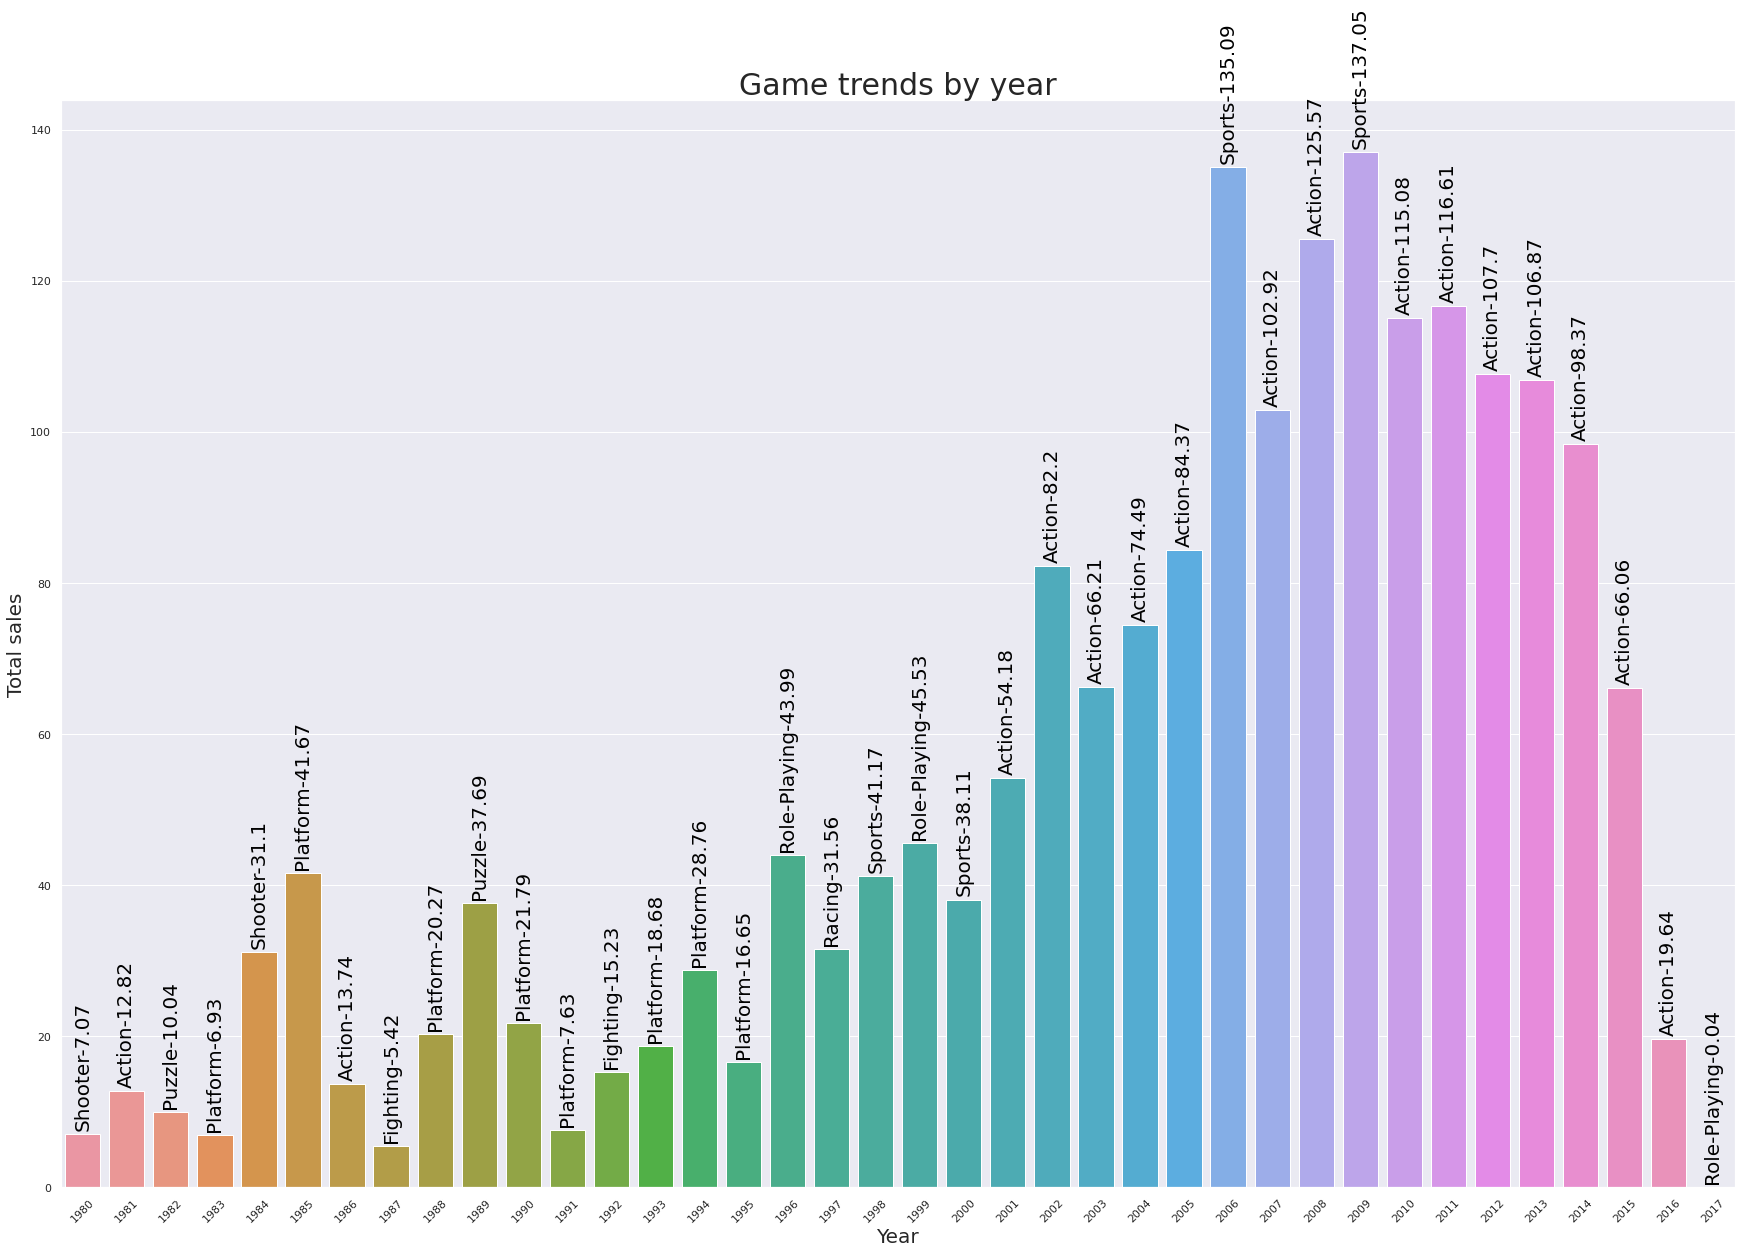

In [ ]:
genre = year_sale_max['Genre']

plt.figure(figsize=(30,20))
g = sns.barplot(x='Year',y='Total_Sales',data=year_sale_max) 

# bar에 설명을 넣기.
index = 0 # for문을 위한 숫자를 넣은 변수

for v in year_sale_max['Total_Sales']:
   g.text(index, v + 1, str(genre[index] + '-' + str(round(v,2))), color='#000',size=20,rotation= 90,ha='center' )
   index += 1

plt.title('Game trends by year',fontsize=30)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Total sales',fontsize=20)

plt.xticks(rotation=45) # 45도로 x축 제목을 틀겠다.
plt.show


In [ ]:
## ========================= 시각화를 통한 분석 ===============================

######## 연도별 게임 트렌드 시각화 ############

# 2001년 부터 액션게임의 수요가 급격히 늘어났다.

# 폭발적인 게임의 수요가 증가하던 2006년과 2009년에 스포츠게임의 수요가 엄청났다.

# 2009년 이후로는 Action장르가 계속해서 1위를 차지하였다.


In [ ]:
# 게임중 가장 많이 팔린게임을 골라내고 , 왜 많이 팔렸을지 분석및 시각화 프로세스 

# 필요한 피쳐가 무엇일까? -> Name , Year , Genre , Total_Sales

sortdf = df.sort_values(by=['Total_Sales'], ascending=False)  #값을 기준으로 정렬한다
top_game_sale = sortdf.head(20)
top_game_sale = top_game_sale[['Name','Year','Genre','Total_Sales']]
top_game_sale['Year']=top_game_sale['Year'].astype(int)
top_game_sale = top_game_sale.sort_values(by=['Total_Sales'], ascending=False)
top_game_sale = top_game_sale.reset_index(drop=True)


In [ ]:
top_game_sale

,Name,Year,Genre,Total_Sales
0,Wii Sports,2006,Sports,82.74
1,Super Mario Bros.,1985,Platform,40.24
2,Mario Kart Wii,2008,Racing,35.83
3,Wii Sports Resort,2009,Sports,33.00
4,Pokemon Red/Pokemon Blue,1996,Role-Playing,31.38
5,Tetris,1989,Puzzle,30.26
6,New Super Mario Bros.,2006,Platform,30.01
7,Wii Play,2006,Misc,29.01
8,New Super Mario Bros. Wii,2009,Platform,28.61
9,Duck Hunt,1984,Shooter,28.31


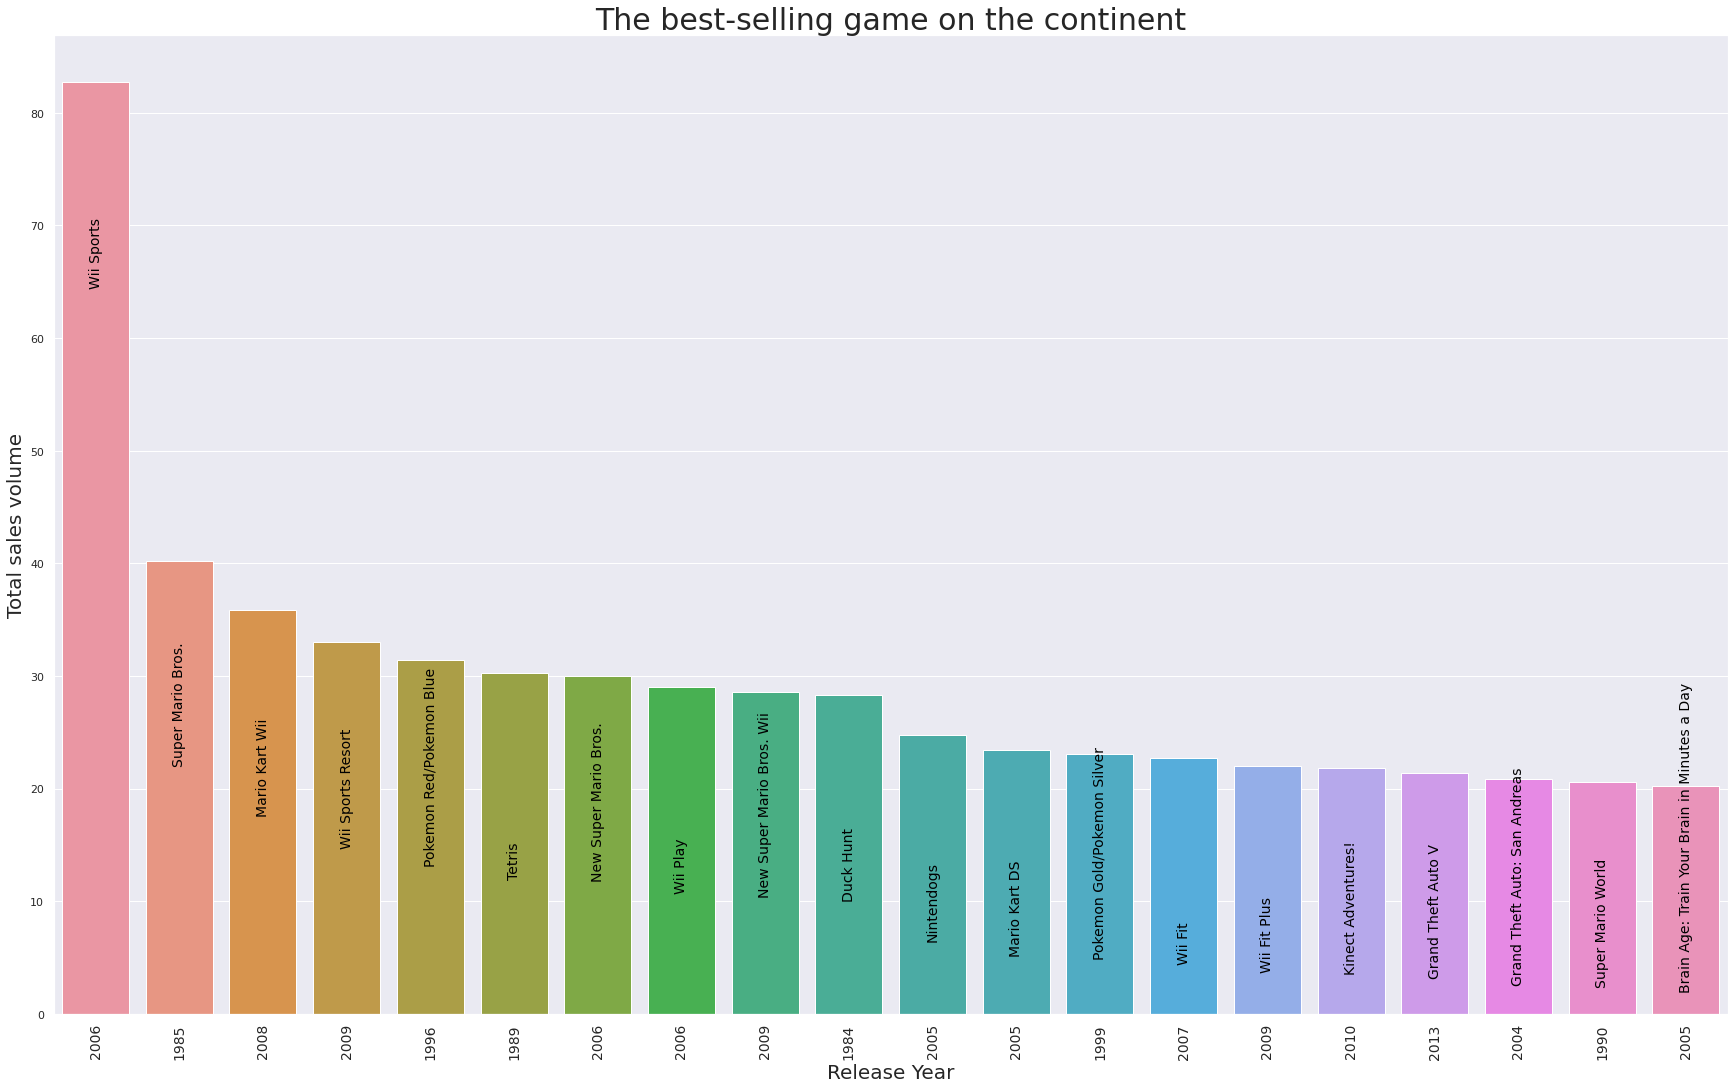

In [ ]:
# 변수를 만들고 그안에 피쳐의 값들을 (리스트형태로 자동) 할당 // name = ['게임 명','',...] // year = ['년도','',...]
name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 20)         # arange > 0 ~ 19 나열 합니다. 따라서 y 값은 = [0,1,2,3 ~ 19] 리스트가 할당되어집니다.

plt.figure(figsize=(30, 18))  #plot의 사이즈를 정합니다.
g = sns.barplot(x='Name', y='Total_Sales', data=top_game_sale) # 변수'g'에 바플랏을 넣고 해당 바플랏이 나타낼 x축y축 값을 정해준다.data= 사용할 데이터셋

index = 0 # 초기값을 설정합니다.
for value in top_game_sale['Total_Sales']: # 내가만든 데이터프레임 top_game_sale의 'Total_Sales' 피쳐의 값들을 하나씩 순서대로 불러온다. >> 82.74 , 40.24 ,35.83 이렇게
    g.text(index, value - 18, name[index], color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(y, top_game_sale['Year'], fontsize=14, rotation=90)   #
plt.title("The best-selling game on the continent", fontsize=30) # 그래프의 총 제목  : 원초적 데이터의 의미
plt.xlabel("Release Year", fontsize=20)       # x축 라벨 설정 , 제목을 짓는것임.
plt.ylabel("Total sales volume", fontsize=20) # y축 라벨 설정
plt.show()


In [ ]:
## ================================== 역대급으로 가장 많은 판매량을 기록했던 게임 알아보기 =======================================. ##


# 위의 바플랏을 그림으로써(시각화) 가장 많이 팔린 게임을 알수 있게 되었다.
# 1위 wii sports , 2위는 super mario , 3위는  Mario Kart이다.


